In [1]:
from ned import Net_moduls
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data

## Tehran Index DF and Tehran DF Normed Return 90 Far - 00 Far

In [2]:
tehran_df_completeDates = pd.read_csv('../../Data/Tehran_df_shifted.csv').set_index('date')

In [3]:
tehran_df_reg = pd.read_excel('../../Data/Tehran_Indexes_NormedReturned_Regimed.xlsx').set_index('date')

In [4]:
tehran_df_reg = tehran_df_reg.loc[tehran_df_completeDates.index]

In [5]:
tehran_df = tehran_df_completeDates.iloc[:-300]

## Tehran Ox 2 Regimed DF Normed Return 90 Far - 00 Far 

In [6]:
tehran_df_TwoReg_Ox_1 = tehran_df_reg[tehran_df_reg['Ox_2']==0]
tehran_df_TwoReg_Ox_2 = tehran_df_reg[tehran_df_reg['Ox_2']==1]
tehran_df_TwoReg_Ox_1 = tehran_df_TwoReg_Ox_1[tehran_df_TwoReg_Ox_1.columns[:-12]]
tehran_df_TwoReg_Ox_2 = tehran_df_TwoReg_Ox_2[tehran_df_TwoReg_Ox_2.columns[:-12]]

## Tehran Ox 2 Regimed DF Normed Return 90 Far - 98 Dey 

In [7]:
tehran_df_TwoReg_Ox_1_98 = tehran_df[tehran_df_reg.iloc[:-300]['Ox_2']==0]
tehran_df_TwoReg_Ox_2_98 = tehran_df[tehran_df_reg.iloc[:-300]['Ox_2']==1]

/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_2187/1326700440.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tehran_df_TwoReg_Ox_1_98 = tehran_df[tehran_df_reg.iloc[:-300]['Ox_2']==0]
/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_2187/1326700440.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tehran_df_TwoReg_Ox_2_98 = tehran_df[tehran_df_reg.iloc[:-300]['Ox_2']==1]


## Tehran Ox 2 Regimed DF Normed Return 90 Far - 00 Far / Same Length

In [8]:
max_length_TwoReg_Ox_2 = min(len(tehran_df_TwoReg_Ox_1), len(tehran_df_TwoReg_Ox_2))
tehran_df_TwoReg_Ox_1_same_length = tehran_df_TwoReg_Ox_1[-max_length_TwoReg_Ox_2:]
tehran_df_TwoReg_Ox_2_same_length = tehran_df_TwoReg_Ox_2[-max_length_TwoReg_Ox_2:]

## Tehran Ox 2 Regimed DF Normed Return 90 Far - 98 Dey / Same Length

In [9]:
max_length_TwoReg_Ox_2_98 = min(len(tehran_df_TwoReg_Ox_1_98), len(tehran_df_TwoReg_Ox_2_98))
tehran_df_TwoReg_Ox_1_same_length_98 = tehran_df_TwoReg_Ox_1_98[-max_length_TwoReg_Ox_2_98:]
tehran_df_TwoReg_Ox_2_same_length_98 = tehran_df_TwoReg_Ox_2_98[-max_length_TwoReg_Ox_2_98:]

In [10]:
nm = Net_moduls()

# 7) Tehran 2 Regime Pearson (Based on Median Threshold) Period of 90 Far - 98 Dey

In [11]:
thr7_1 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_1_same_length_98)
thr7_2 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_2_same_length_98)
thr7 = min(thr7_1, thr7_2)
thr7

0.042706147472332756

In [16]:
nm = Net_moduls()
pearson_network_TwoReg_Ox_1_98 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length_98, method='pearson', threshold=thr7)

In [17]:
nm.get_network_features(pearson_network_TwoReg_Ox_1_98)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.611111,605,0.812819,0.611111,0.009232,0.738245,1.39697


In [18]:
nm.get_network_features(pearson_network_TwoReg_Ox_1_98).to_csv('Excels/7_1.csv')

In [19]:
b7_1 = dict(nx.degree(pearson_network_TwoReg_Ox_1_98))
b7_1 = np.array(dict(sorted(b7_1.items(), key=lambda item: item[1])))
b7_1

array({'DastgahayeBargi': 3, 'M2': 6, 'HOUSE': 7, 'M1': 7, 'GDP': 8, 'USD': 9, 'CPI': 9, 'AbzaralatePezeshki': 11, 'Euro': 12, 'Coin': 12, 'FaravardehayeNafti': 15, 'Gold': 16, 'HamlVaNaghl': 16, 'Mansojat': 29, 'FaniVaMohandesi': 31, 'paper': 32, 'EntesharVaChap': 32, 'VasayelErtebati': 32, 'Bank': 32, 'Rayaneh': 32, 'Mali': 32, 'Agriculture': 33, 'SayerMadan': 33, 'Wood': 33, 'Lastic': 33, 'MashinAlat': 33, 'GazaeeBejozGhand': 33, 'Siman': 33, 'SarmayeGozari': 33, 'EstekrajeNaft': 34, 'khodrosazi': 34, 'GhandVaShekar': 34, 'Shimiyaee': 34, 'Bimeh': 34, 'KanehayeFelezi': 34, 'MahsolateFelezi': 35, 'Daroee': 35, 'KashiVaSeramik': 35, 'SayerMali': 35, 'FelezateAsasi': 36, 'ChandReshteSanati': 36, 'Amlakva': 36, 'index': 37, 'CoalMining': 37, 'KanehayeGeyreFelezi': 37},
      dtype=object)

In [20]:
pearson_network_TwoReg_Ox_2_98 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length_98, method='pearson', threshold=thr7)

In [21]:
nm.get_network_features(pearson_network_TwoReg_Ox_2_98)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.558454,578,0.698283,0.558454,0.010101,0.706188,1.444444


In [22]:
nm.get_network_features(pearson_network_TwoReg_Ox_2_98).to_csv('Excels/7_2.csv')

In [23]:
b7_2 = dict(nx.degree(pearson_network_TwoReg_Ox_2_98))
b7_2 = np.array(dict(sorted(b7_2.items(), key=lambda item: item[1])))
b7_2

array({'GDP': 6, 'FaravardehayeNafti': 7, 'Gold': 7, 'M2': 10, 'M1': 10, 'Brent Oil': 12, 'Coin': 14, 'Mansojat': 15, 'HOUSE': 15, 'GhandVaShekar': 16, 'Euro': 16, 'CoalMining': 17, 'USD': 17, 'FelezateAsasi': 19, 'VasayelErtebati': 22, 'ChandReshteSanati': 23, 'KanehayeFelezi': 23, 'CPI': 24, 'AbzaralatePezeshki': 24, 'Wood': 25, 'Agriculture': 27, 'Bank': 27, 'Rayaneh': 28, 'khodrosazi': 29, 'Shimiyaee': 29, 'KashiVaSeramik': 29, 'HamlVaNaghl': 29, 'EstekrajeNaft': 30, 'MahsolateFelezi': 30, 'EntesharVaChap': 30, 'DastgahayeBargi': 30, 'Bimeh': 30, 'Mali': 30, 'SayerMadan': 32, 'SayerMali': 33, 'FaniVaMohandesi': 33, 'Lastic': 34, 'paper': 35, 'Daroee': 35, 'SarmayeGozari': 35, 'index': 36, 'MashinAlat': 36, 'GazaeeBejozGhand': 36, 'Siman': 36, 'Amlakva': 36, 'KanehayeGeyreFelezi': 39},
      dtype=object)

<Figure size 1600x1200 with 0 Axes>

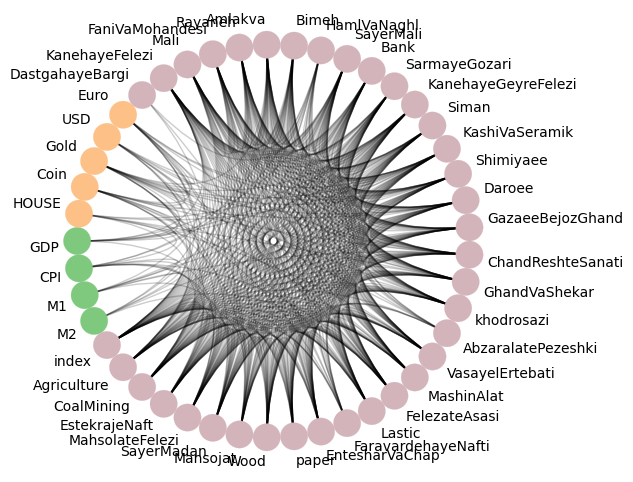

In [24]:
circos = nm.plot_circos_network(pearson_network_TwoReg_Ox_1_98)
circos.draw()

# 8) Tehran 2 Regime Pearson (Based on Median Threshold) Period of 90 Far - 00 Far

In [12]:
thr8_1 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_1_same_length)
thr8_2 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_2_same_length)
thr8 = min(thr8_1, thr8_2)
thr8

0.03794854693443965

In [31]:
nm = Net_moduls()
pearson_network_TwoReg_Ox_1 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length, method='pearson', threshold=thr8)

In [32]:
nm.get_network_features(pearson_network_TwoReg_Ox_1)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.711111,736,0.849764,0.711111,0.006741,0.791651,1.296618


In [33]:
nm.get_network_features(pearson_network_TwoReg_Ox_1).to_csv('Excels/8_1.csv')

In [34]:
b8_1 = dict(nx.degree(pearson_network_TwoReg_Ox_1))
b8_1 = np.array(dict(sorted(b8_1.items(), key=lambda item: item[1])))
b8_1

array({'DastgahayeBargi': 6, 'AbzaralatePezeshki': 11, 'M1': 11, 'GDP': 12, 'M2': 12, 'Gold': 13, 'Coin': 16, 'FaravardehayeNafti': 24, 'USD': 26, 'Mali': 26, 'Brent Oil': 27, 'Euro': 28, 'Mansojat': 30, 'paper': 32, 'CPI': 33, 'HOUSE': 33, 'HamlVaNaghl': 33, 'Wood': 34, 'KashiVaSeramik': 34, 'VasayelErtebati': 35, 'FaniVaMohandesi': 35, 'CoalMining': 36, 'EstekrajeNaft': 36, 'SayerMadan': 36, 'Lastic': 37, 'MashinAlat': 37, 'Bank': 37, 'SayerMali': 37, 'Bimeh': 37, 'Agriculture': 38, 'MahsolateFelezi': 38, 'GhandVaShekar': 38, 'GazaeeBejozGhand': 38, 'Siman': 38, 'Amlakva': 38, 'EntesharVaChap': 39, 'Shimiyaee': 39, 'KanehayeGeyreFelezi': 39, 'SarmayeGozari': 39, 'Rayaneh': 39, 'KanehayeFelezi': 39, 'Daroee': 40, 'khodrosazi': 41, 'ChandReshteSanati': 41, 'index': 42, 'FelezateAsasi': 42},
      dtype=object)

In [35]:
pearson_network_TwoReg_Ox_2 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length, method='pearson', threshold=thr8)

In [36]:
nm.get_network_features(pearson_network_TwoReg_Ox_2)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.589372,610,0.730564,0.589372,0.009398,0.72142,1.413527


In [37]:
nm.get_network_features(pearson_network_TwoReg_Ox_2).to_csv('Excels/8_2.csv')

In [38]:
b8_2 = dict(nx.degree(pearson_network_TwoReg_Ox_2))
b8_2 = np.array(dict(sorted(b8_2.items(), key=lambda item: item[1])))
b8_2

array({'FaravardehayeNafti': 8, 'Brent Oil': 9, 'HOUSE': 9, 'M1': 10, 'Mansojat': 13, 'Coin': 14, 'M2': 15, 'GhandVaShekar': 15, 'CoalMining': 16, 'Gold': 18, 'GDP': 19, 'Euro': 20, 'USD': 21, 'CPI': 23, 'KanehayeFelezi': 23, 'Wood': 24, 'HamlVaNaghl': 24, 'FelezateAsasi': 25, 'VasayelErtebati': 25, 'Agriculture': 26, 'ChandReshteSanati': 26, 'AbzaralatePezeshki': 27, 'EntesharVaChap': 29, 'Daroee': 29, 'paper': 30, 'SayerMadan': 31, 'KashiVaSeramik': 31, 'Bank': 31, 'GazaeeBejozGhand': 32, 'Bimeh': 32, 'Rayaneh': 32, 'FaniVaMohandesi': 32, 'MahsolateFelezi': 33, 'Shimiyaee': 33, 'Lastic': 34, 'DastgahayeBargi': 34, 'Mali': 34, 'khodrosazi': 35, 'Amlakva': 35, 'Siman': 36, 'EstekrajeNaft': 37, 'MashinAlat': 37, 'SayerMali': 37, 'SarmayeGozari': 38, 'index': 39, 'KanehayeGeyreFelezi': 39},
      dtype=object)

# 9) Tehran 2 Regime Pearson (Based on Median Threshold) Period of 90 Far - 98 Dey/ Last 100 Records

In [13]:
thr9_1 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_1_same_length_98[-100:])
thr9_2 = nm.find_median_pearson_threshold(tehran_df_TwoReg_Ox_2_same_length_98[-100:])
thr9 = min(thr7_1, thr7_2)
thr9

0.042706147472332756

In [40]:
pearson_network_TwoReg_Ox_1_98_last100 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length_98[-100:], method='pearson', threshold=thr9)

In [41]:
nm.get_network_features(pearson_network_TwoReg_Ox_1_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.844444,836,0.877332,0.844444,0.003618,0.874355,1.155556


In [42]:
nm.get_network_features(pearson_network_TwoReg_Ox_1_98_last100).to_csv('Excels/9_1.csv')

In [43]:
b9_1 = dict(nx.degree(pearson_network_TwoReg_Ox_1_98_last100))
b9_1 = np.array(dict(sorted(b9_1.items(), key=lambda item: item[1])))
b9_1

array({'Brent Oil': 21, 'FaravardehayeNafti': 25, 'HOUSE': 26, 'Euro': 27, 'Coin': 28, 'USD': 29, 'M2': 29, 'GDP': 29, 'Gold': 33, 'Wood': 34, 'DastgahayeBargi': 34, 'M1': 36, 'Mansojat': 36, 'CoalMining': 37, 'EntesharVaChap': 37, 'Amlakva': 37, 'KanehayeFelezi': 37, 'EstekrajeNaft': 38, 'Bimeh': 38, 'MashinAlat': 39, 'ChandReshteSanati': 39, 'Daroee': 39, 'Mali': 39, 'CPI': 40, 'paper': 40, 'Lastic': 40, 'khodrosazi': 40, 'GhandVaShekar': 40, 'GazaeeBejozGhand': 40, 'Bank': 40, 'SayerMali': 40, 'SayerMadan': 41, 'KanehayeGeyreFelezi': 41, 'SarmayeGozari': 41, 'HamlVaNaghl': 41, 'index': 42, 'Agriculture': 42, 'MahsolateFelezi': 42, 'FelezateAsasi': 42, 'Shimiyaee': 42, 'KashiVaSeramik': 42, 'Siman': 42, 'Rayaneh': 42, 'FaniVaMohandesi': 42, 'VasayelErtebati': 43},
      dtype=object)

In [44]:
pearson_network_TwoReg_Ox_2_98_last100 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length_98[-100:], method='pearson', threshold=thr9)

In [45]:
nm.get_network_features(pearson_network_TwoReg_Ox_2_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.748485,741,0.778801,0.748485,0.005849,0.80532,1.251515


In [46]:
nm.get_network_features(pearson_network_TwoReg_Ox_2_98_last100).to_csv('Excels/9_2.csv')

In [47]:
b9_2 = dict(nx.degree(pearson_network_TwoReg_Ox_2_98_last100))
b9_2 = np.array(dict(sorted(b9_2.items(), key=lambda item: item[1])))
b9_2

array({'FaravardehayeNafti': 16, 'GDP': 19, 'Gold': 24, 'Wood': 27, 'ChandReshteSanati': 28, 'Shimiyaee': 28, 'Brent Oil': 29, 'USD': 29, 'CoalMining': 29, 'FelezateAsasi': 29, 'HOUSE': 30, 'VasayelErtebati': 30, 'Euro': 30, 'Agriculture': 31, 'EstekrajeNaft': 31, 'Bank': 31, 'Bimeh': 31, 'Rayaneh': 32, 'M1': 32, 'MashinAlat': 34, 'KashiVaSeramik': 34, 'Amlakva': 34, 'Coin': 35, 'MahsolateFelezi': 35, 'SayerMadan': 35, 'GhandVaShekar': 35, 'SayerMali': 35, 'Mali': 35, 'KanehayeFelezi': 35, 'CPI': 36, 'M2': 36, 'EntesharVaChap': 36, 'Siman': 36, 'HamlVaNaghl': 36, 'FaniVaMohandesi': 36, 'paper': 37, 'DastgahayeBargi': 37, 'khodrosazi': 37, 'Daroee': 37, 'KanehayeGeyreFelezi': 37, 'Lastic': 38, 'GazaeeBejozGhand': 38, 'Mansojat': 39, 'index': 41, 'SarmayeGozari': 42},
      dtype=object)

# 10) Tehran 2 Regime Pearson (Based on Median Threshold) Period of 90 Far - 98 Dey/ 50 windows of 100 Records

In [48]:
nm = Net_moduls()
pearson_network_TwoReg_Ox_1_98_averged = nm.get_network_features_averaged_median(tehran_df, regimes_column= tehran_df_reg.iloc[:-300]['Ox_2'],method='pearson',edges_threshold=200, target_window=100, target_length=50)

/Users/hossein4527/MEGA/MEGAsync/Commit/Neda_PhD/neda_sep2023/Time_Series_Trend_Forcasting/Codes/Shifted DF by Lags/ned.py:1106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selected_regimes'] = regimes_column


Number of columns data in our DataFrame is = 46
fixed_thr= 0.1921261517164633


In [49]:
pearson_network_TwoReg_Ox_1_98_averged

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
Means,2.960000,4.740000,0.546716,498.120000,0.792270,0.546716,0.015984,0.644395,1.658651
STDs,0.197949,0.664247,0.021704,14.962047,0.019091,0.021704,0.001982,0.025734,0.083118
Means,2.680000,4.380000,0.205899,198.340000,0.448329,0.205899,0.026101,0.488545,2.107548
STDs,0.471212,0.490314,0.020593,17.681548,0.040249,0.020593,0.001684,0.018029,0.078218


In [50]:
pearson_network_TwoReg_Ox_1_98_averged.to_csv('Excels/10.csv')

# 11) Tehran 2 Regime Pearson (Based on Median Threshold) Period of 90 Far - 00 Far/ 50 windows of 100 Records

In [53]:
nm = Net_moduls()
pearson_network_TwoReg_Ox_90_00_averged = nm.get_network_features_averaged_median(tehran_df_completeDates, regimes_column= tehran_df_reg['Ox_2'],method='pearson',edges_threshold=200, target_window=100, target_length=50)

Number of columns data in our DataFrame is = 46
fixed_thr= 0.16617228203412682


In [54]:
pearson_network_TwoReg_Ox_90_00_averged

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
Means,2.000000,3.480000,0.509014,521.420000,0.769993,0.509014,0.012651,0.670329,1.554076
STDs,0.000000,0.504672,0.025539,19.397128,0.015423,0.025539,0.001091,0.018930,0.050316
Means,2.180000,3.860000,0.255478,249.740000,0.472647,0.255478,0.021175,0.536306,1.905228
STDs,0.388088,0.350510,0.021173,17.778467,0.036595,0.021173,0.000962,0.013008,0.046112


In [55]:
pearson_network_TwoReg_Ox_90_00_averged.to_csv('Excels/11.csv')

# 12) Tehran 2 Regime Entropy (Based on Median Threshold) Period of 90 Far - 00 Far

In [56]:
thr12_1 = nm.find_median_entropy_threshold(tehran_df_TwoReg_Ox_1_same_length)
thr12_2 = nm.find_median_entropy_threshold(tehran_df_TwoReg_Ox_2_same_length)
thr12 = min(thr12_1, thr12_2)

In [57]:
thr12

0.007553689098620789

In [58]:
nm = Net_moduls()
entropy_network_TwoReg_Ox_1 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length, method='entropy', threshold=thr12)

In [59]:
nm.get_network_features(entropy_network_TwoReg_Ox_1)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.800966,829,0.834113,0.800966,0.004523,0.841627,1.199034


In [60]:
nm.get_network_features(entropy_network_TwoReg_Ox_1).to_csv('Excels/12_1.csv')

In [61]:
b12_1 = dict(nx.degree(entropy_network_TwoReg_Ox_1))
b12_1 = np.array(dict(sorted(b12_1.items(), key=lambda item: item[1])))
b12_1

array({'M2': 22, 'HOUSE': 22, 'GDP': 22, 'Gold': 25, 'Mansojat': 26, 'M1': 30, 'CPI': 30, 'Amlakva': 31, 'Bimeh': 33, 'USD': 34, 'GazaeeBejozGhand': 34, 'paper': 34, 'index': 35, 'Euro': 35, 'GhandVaShekar': 35, 'Daroee': 35, 'SayerMali': 36, 'KanehayeFelezi': 36, 'Wood': 37, 'KanehayeGeyreFelezi': 37, 'SarmayeGozari': 37, 'Mali': 37, 'Coin': 38, 'Agriculture': 38, 'FelezateAsasi': 38, 'VasayelErtebati': 38, 'AbzaralatePezeshki': 38, 'EstekrajeNaft': 39, 'EntesharVaChap': 39, 'FaravardehayeNafti': 39, 'MashinAlat': 39, 'DastgahayeBargi': 39, 'Shimiyaee': 39, 'KashiVaSeramik': 39, 'HamlVaNaghl': 39, 'khodrosazi': 39, 'CoalMining': 40, 'Bank': 40, 'FaniVaMohandesi': 40, 'Brent Oil': 41, 'MahsolateFelezi': 41, 'SayerMadan': 41, 'ChandReshteSanati': 41, 'Rayaneh': 42, 'Lastic': 44, 'Siman': 44},
      dtype=object)

In [ ]:
entropy_network_TwoReg_Ox_2 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length, method='entropy', threshold=thr12)

In [ ]:
nm.get_network_features(entropy_network_TwoReg_Ox_2)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.737198,763,0.743586,0.737198,0.005973,0.794813,1.262802


In [ ]:
nm.get_network_features(entropy_network_TwoReg_Ox_2).to_csv('Excels/12_2.csv')

In [ ]:
b12_2 = dict(nx.degree(entropy_network_TwoReg_Ox_2))
b12_2 = np.array(dict(sorted(b12_2.items(), key=lambda item: item[1])))
b12_2

array({'Brent Oil': 25, 'GhandVaShekar': 27, 'MahsolateFelezi': 28, 'M2': 29, 'EntesharVaChap': 29, 'KashiVaSeramik': 29, 'index': 30, 'SayerMadan': 30, 'GDP': 30, 'khodrosazi': 30, 'VasayelErtebati': 31, 'Siman': 31, 'KanehayeFelezi': 31, 'AbzaralatePezeshki': 31, 'Bank': 31, 'GazaeeBejozGhand': 31, 'Rayaneh': 31, 'M1': 32, 'EstekrajeNaft': 32, 'FelezateAsasi': 32, 'paper': 32, 'Mali': 32, 'SarmayeGozari': 33, 'HOUSE': 33, 'Amlakva': 33, 'KanehayeGeyreFelezi': 33, 'Wood': 34, 'MashinAlat': 34, 'Bimeh': 34, 'HamlVaNaghl': 34, 'Gold': 35, 'SayerMali': 35, 'FaniVaMohandesi': 35, 'Lastic': 36, 'CPI': 36, 'Euro': 37, 'USD': 37, 'CoalMining': 37, 'Coin': 38, 'Mansojat': 38, 'FaravardehayeNafti': 38, 'DastgahayeBargi': 38, 'ChandReshteSanati': 38, 'Agriculture': 38, 'Daroee': 39, 'Shimiyaee': 39},
      dtype=object)

# 12.5) Tehran 2 Regime Entropy (Based on Median Threshold) Period of 90 Far - 98 Far

In [69]:
thr12_5_1 = nm.find_median_entropy_threshold(tehran_df_TwoReg_Ox_1_same_length_98)
thr12_5_2 = nm.find_median_entropy_threshold(tehran_df_TwoReg_Ox_2_same_length_98)
thr12_5 = min(thr12_5_1, thr12_5_2)

In [70]:
thr12_5

0.008698537969941413

In [71]:
nm = Net_moduls()
entropy_network_TwoReg_Ox_98_1 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length_98, method='entropy', threshold=thr12_5)

In [72]:
nm.get_network_features(entropy_network_TwoReg_Ox_98_1)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.823188,852,0.846342,0.823188,0.004018,0.85632,1.176812


In [73]:
nm.get_network_features(entropy_network_TwoReg_Ox_98_1).to_csv('Excels/12.5_1.csv')

In [74]:
b12_5_1 = dict(nx.degree(entropy_network_TwoReg_Ox_98_1))
b12_5_1 = np.array(dict(sorted(b12_5_1.items(), key=lambda item: item[1])))
b12_5_1

array({'M1': 25, 'M2': 26, 'CPI': 28, 'HOUSE': 29, 'GDP': 29, 'Gold': 30, 'GazaeeBejozGhand': 31, 'index': 33, 'GhandVaShekar': 34, 'Rayaneh': 34, 'Bank': 34, 'ChandReshteSanati': 34, 'MahsolateFelezi': 35, 'AbzaralatePezeshki': 35, 'DastgahayeBargi': 35, 'Bimeh': 35, 'FaravardehayeNafti': 36, 'SarmayeGozari': 36, 'Mali': 36, 'USD': 37, 'FaniVaMohandesi': 37, 'FelezateAsasi': 38, 'Shimiyaee': 38, 'KashiVaSeramik': 38, 'HamlVaNaghl': 38, 'Amlakva': 38, 'Brent Oil': 38, 'paper': 38, 'Wood': 40, 'khodrosazi': 40, 'SayerMadan': 40, 'Siman': 40, 'Euro': 41, 'EstekrajeNaft': 41, 'Mansojat': 41, 'Coin': 41, 'Agriculture': 42, 'Daroee': 42, 'KanehayeGeyreFelezi': 42, 'EntesharVaChap': 42, 'VasayelErtebati': 42, 'KanehayeFelezi': 42, 'CoalMining': 43, 'MashinAlat': 43, 'SayerMali': 43, 'Lastic': 44},
      dtype=object)

In [75]:
entropy_network_TwoReg_Ox_98_2 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length_98, method='entropy', threshold=thr12_5)

In [76]:
nm.get_network_features(entropy_network_TwoReg_Ox_98_2)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.740097,766,0.74834,0.740097,0.005907,0.797069,1.259903


In [77]:
nm.get_network_features(entropy_network_TwoReg_Ox_98_2).to_csv('Excels/12.5_2.csv')

In [78]:
b12_5_2 = dict(nx.degree(entropy_network_TwoReg_Ox_98_2))
b12_5_2 = np.array(dict(sorted(b12_5_2.items(), key=lambda item: item[1])))
b12_5_2

array({'EntesharVaChap': 23, 'GDP': 24, 'index': 26, 'SayerMadan': 26, 'M1': 28, 'M2': 30, 'EstekrajeNaft': 30, 'Amlakva': 30, 'khodrosazi': 31, 'Siman': 31, 'MahsolateFelezi': 31, 'Coin': 31, 'AbzaralatePezeshki': 31, 'Gold': 32, 'Euro': 32, 'Lastic': 33, 'GhandVaShekar': 33, 'GazaeeBejozGhand': 33, 'HamlVaNaghl': 33, 'Agriculture': 33, 'HOUSE': 34, 'Wood': 34, 'VasayelErtebati': 34, 'FaravardehayeNafti': 34, 'ChandReshteSanati': 34, 'SarmayeGozari': 34, 'SayerMali': 34, 'CoalMining': 35, 'Daroee': 35, 'Bimeh': 35, 'Brent Oil': 35, 'paper': 35, 'Bank': 35, 'Rayaneh': 35, 'Mali': 35, 'KanehayeGeyreFelezi': 35, 'KashiVaSeramik': 36, 'KanehayeFelezi': 36, 'MashinAlat': 37, 'CPI': 37, 'FelezateAsasi': 37, 'USD': 38, 'FaniVaMohandesi': 38, 'DastgahayeBargi': 38, 'Shimiyaee': 40, 'Mansojat': 41},
      dtype=object)

# 13) Tehran 2 Regime Entropy (Based on Median Threshold) Period of 90 Far - 98 Dey/ Last 100 Records

In [79]:
thr13_1 = nm.find_median_entropy_threshold(tehran_df_TwoReg_Ox_1_same_length_98[-100:])
thr13_2 = nm.find_median_entropy_threshold(tehran_df_TwoReg_Ox_2_same_length_98[-100:])
thr13 = min(thr13_1, thr13_2)

In [80]:
thr13

0.024630480428955537

In [81]:
entropy_network_TwoReg_Ox_1_98_last100 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length_98[-100:], method='entropy', threshold=thr13)

In [82]:
nm.get_network_features(entropy_network_TwoReg_Ox_1_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,1,2,0.824242,816,0.841163,0.824242,0.004087,0.855469,1.175758


In [83]:
nm.get_network_features(entropy_network_TwoReg_Ox_1_98_last100).to_csv('Excels/13_1.csv')

In [84]:
b13_1 = dict(nx.degree(entropy_network_TwoReg_Ox_1_98_last100))
b13_1 = np.array(dict(sorted(b13_1.items(), key=lambda item: item[1])))
b13_1

array({'Coin': 23, 'Brent Oil': 27, 'EntesharVaChap': 29, 'Euro': 31, 'khodrosazi': 31, 'M2': 32, 'Siman': 32, 'KanehayeFelezi': 33, 'USD': 34, 'CPI': 34, 'HOUSE': 34, 'Bank': 34, 'M1': 35, 'GDP': 35, 'SarmayeGozari': 35, 'Mali': 35, 'Mansojat': 36, 'KashiVaSeramik': 36, 'FaniVaMohandesi': 36, 'Daroee': 36, 'EstekrajeNaft': 36, 'paper': 37, 'Lastic': 37, 'DastgahayeBargi': 37, 'SayerMali': 37, 'HamlVaNaghl': 37, 'FelezateAsasi': 37, 'index': 38, 'Gold': 38, 'FaravardehayeNafti': 38, 'Agriculture': 38, 'ChandReshteSanati': 38, 'KanehayeGeyreFelezi': 38, 'Amlakva': 38, 'Bimeh': 39, 'Shimiyaee': 39, 'CoalMining': 40, 'SayerMadan': 40, 'Wood': 40, 'GazaeeBejozGhand': 40, 'MahsolateFelezi': 41, 'VasayelErtebati': 42, 'GhandVaShekar': 42, 'MashinAlat': 43, 'Rayaneh': 44},
      dtype=object)

In [85]:
entropy_network_TwoReg_Ox_2_98_last100 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length_98[-100:], method='entropy', threshold=thr13)

In [86]:
nm.get_network_features(entropy_network_TwoReg_Ox_2_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.694949,688,0.720123,0.694949,0.007094,0.77031,1.305051


In [87]:
nm.get_network_features(entropy_network_TwoReg_Ox_2_98_last100).to_csv('Excels/13_2.csv')

In [88]:
b13_2 = dict(nx.degree(entropy_network_TwoReg_Ox_2_98_last100))
b13_2 = np.array(dict(sorted(b13_2.items(), key=lambda item: item[1])))
b13_2

array({'Gold': 20, 'GDP': 20, 'EstekrajeNaft': 22, 'CoalMining': 26, 'CPI': 26, 'Lastic': 26, 'Mali': 27, 'Wood': 27, 'HamlVaNaghl': 28, 'Brent Oil': 28, 'HOUSE': 28, 'FaniVaMohandesi': 28, 'Coin': 28, 'Euro': 28, 'M1': 28, 'index': 29, 'MahsolateFelezi': 29, 'Bank': 29, 'GhandVaShekar': 30, 'Shimiyaee': 30, 'DastgahayeBargi': 30, 'Amlakva': 30, 'SayerMali': 30, 'SarmayeGozari': 31, 'KanehayeFelezi': 31, 'paper': 31, 'M2': 32, 'USD': 32, 'MashinAlat': 32, 'KanehayeGeyreFelezi': 32, 'Mansojat': 33, 'FaravardehayeNafti': 33, 'ChandReshteSanati': 34, 'Bimeh': 34, 'KashiVaSeramik': 34, 'Siman': 35, 'EntesharVaChap': 35, 'GazaeeBejozGhand': 35, 'VasayelErtebati': 35, 'FelezateAsasi': 36, 'Daroee': 36, 'Rayaneh': 36, 'khodrosazi': 37, 'Agriculture': 37, 'SayerMadan': 38},
      dtype=object)

# 14) Tehran 2 Regime Entropy (Based on Median Threshold) Period of 90 Far - 98 Dey/ 50 windows of 100 Records

In [90]:
nm = Net_moduls()
entropy_network_TwoReg_Ox_90_98_averged = nm.get_network_features_averaged_median(tehran_df[tehran_df.columns[:46]], \
                                                                                  regimes_column= tehran_df_reg.iloc[:-300]['Ox_2'],\
                                                                                  method='entropy',edges_threshold=200, \
                                                                                  target_window=100, \
                                                                                  target_length=50)

Number of columns data in our DataFrame is = 46
fixed_thr= 0.029448185147545984


In [91]:
entropy_network_TwoReg_Ox_90_98_averged

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
Means,2.0,2.0,0.672020,665.300000,0.719698,0.672020,0.007627,0.761145,1.327980
STDs,0.0,0.0,0.036773,36.405455,0.026773,0.036773,0.000855,0.019394,0.036773
Means,2.0,2.0,0.600384,594.380000,0.644677,0.600384,0.009293,0.719110,1.399616
STDs,0.0,0.0,0.021253,21.040185,0.023678,0.021253,0.000494,0.011690,0.021253


In [92]:
entropy_network_TwoReg_Ox_90_98_averged.to_csv('Excels/14.csv')

# 15) Tehran 2 Regime Entropy (Based on Median Threshold) Period of 90 Far - 00 Far/ 50 windows of 100 Records

In [93]:
nm = Net_moduls()
entropy_network_TwoReg_Ox_90_00_averged = nm.get_network_features_averaged_median(tehran_df_completeDates[tehran_df_completeDates.columns[:46]], \
                                                                                  regimes_column= tehran_df_reg['Ox_2'],\
                                                                                  method='entropy',edges_threshold=200, \
                                                                                  target_window=100, target_length=50)

Number of columns data in our DataFrame is = 46
fixed_thr= 0.02453523351719661


In [94]:
entropy_network_TwoReg_Ox_90_00_averged

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
Means,2.0,2.0,0.690010,714.160000,0.738252,0.690010,0.007045,0.770551,1.309990
STDs,0.0,0.0,0.019697,20.386430,0.020286,0.019697,0.000448,0.012121,0.019697
Means,2.0,2.0,0.713131,706.000000,0.740673,0.713131,0.006671,0.782041,1.286869
STDs,0.0,0.0,0.021369,21.155402,0.023045,0.021369,0.000497,0.013736,0.021369


In [97]:
entropy_network_TwoReg_Ox_90_00_averged.to_csv('Excels/15.csv')

In [99]:
densities_diff_98 = []
stds_addition_98 = []
for tl in np.arange(20,100,5):
    entropy_network_TwoReg_Ox_90_98_averged = nm.get_network_features_averaged_median(tehran_df[tehran_df.columns[:46]], \
                                                                                  regimes_column= tehran_df_reg.iloc[:-300]['Ox_2'],\
                                                                                  method='entropy',edges_threshold=200, \
                                                                                  target_window=100, \
                                                                                  target_length=tl)
    densities_diff_98.append(entropy_network_TwoReg_Ox_90_98_averged['densities'].iloc[0] - entropy_network_TwoReg_Ox_90_98_averged['densities'].iloc[2])
    stds_addition_98.append(entropy_network_TwoReg_Ox_90_98_averged['densities'].iloc[1] + entropy_network_TwoReg_Ox_90_98_averged['densities'].iloc[3])

Number of columns data in our DataFrame is = 46
fixed_thr= 0.029448185147545984
Number of columns data in our DataFrame is = 46
fixed_thr= 0.029448185147545984
Number of columns data in our DataFrame is = 46
fixed_thr= 0.029448185147545984
Number of columns data in our DataFrame is = 46
fixed_thr= 0.029448185147545984
Number of columns data in our DataFrame is = 46
fixed_thr= 0.029448185147545984
Number of columns data in our DataFrame is = 46
fixed_thr= 0.029448185147545984
Number of columns data in our DataFrame is = 46
fixed_thr= 0.029448185147545984
Number of columns data in our DataFrame is = 46
fixed_thr= 0.029448185147545984
Number of columns data in our DataFrame is = 46
fixed_thr= 0.029448185147545984
Number of columns data in our DataFrame is = 46
fixed_thr= 0.029448185147545984
Number of columns data in our DataFrame is = 46
fixed_thr= 0.029448185147545984
Number of columns data in our DataFrame is = 46
fixed_thr= 0.029448185147545984
Number of columns data in our DataFrame 

In [100]:
densities_diff = []
stds_addition = []
for tl in np.arange(20,100,5):
    entropy_network_TwoReg_Ox_90_00_averged = nm.get_network_features_averaged_median(tehran_df_completeDates[tehran_df_completeDates.columns[:46]], \
                                                                                  regimes_column= tehran_df_reg['Ox_2'],\
                                                                                  method='entropy',edges_threshold=200, \
                                                                                  target_window=100, target_length=tl)
    densities_diff.append(entropy_network_TwoReg_Ox_90_00_averged['densities'].iloc[0] - entropy_network_TwoReg_Ox_90_00_averged['densities'].iloc[2])
    stds_addition.append(entropy_network_TwoReg_Ox_90_00_averged['densities'].iloc[1] + entropy_network_TwoReg_Ox_90_00_averged['densities'].iloc[3])

Number of columns data in our DataFrame is = 46
fixed_thr= 0.02453523351719661
Number of columns data in our DataFrame is = 46
fixed_thr= 0.02453523351719661
Number of columns data in our DataFrame is = 46
fixed_thr= 0.02453523351719661
Number of columns data in our DataFrame is = 46
fixed_thr= 0.02453523351719661
Number of columns data in our DataFrame is = 46
fixed_thr= 0.02453523351719661
Number of columns data in our DataFrame is = 46
fixed_thr= 0.02453523351719661
Number of columns data in our DataFrame is = 46
fixed_thr= 0.02453523351719661
Number of columns data in our DataFrame is = 46
fixed_thr= 0.02453523351719661
Number of columns data in our DataFrame is = 46
fixed_thr= 0.02453523351719661
Number of columns data in our DataFrame is = 46
fixed_thr= 0.02453523351719661
Number of columns data in our DataFrame is = 46
fixed_thr= 0.02453523351719661
Number of columns data in our DataFrame is = 46
fixed_thr= 0.02453523351719661
Number of columns data in our DataFrame is = 46
fixe

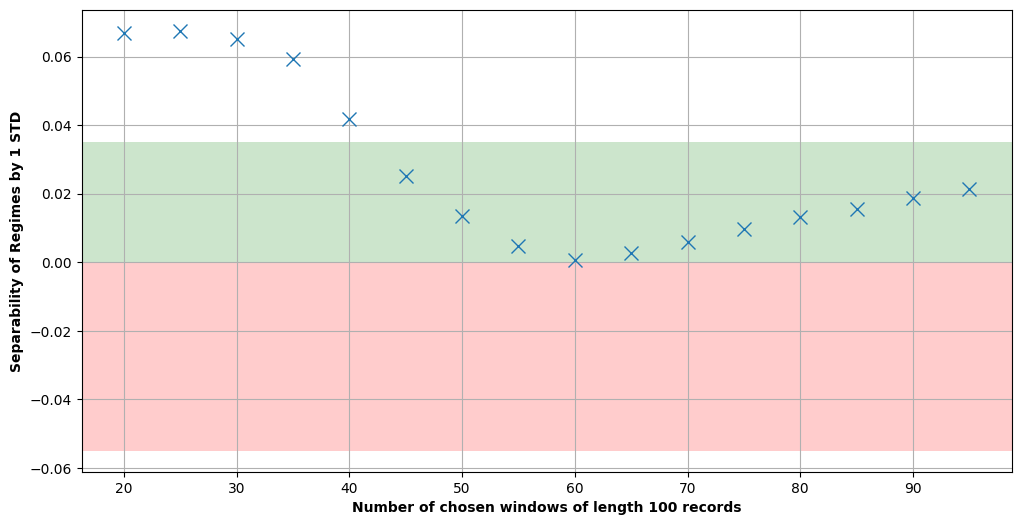

In [101]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(np.arange(20,100,5), np.array(densities_diff_98)-np.array(stds_addition_98), 'x', markersize=10)
# ax.margins(0)
ax.axhspan(0, 0.035, facecolor='green', alpha=0.2)
ax.axhspan(-0.055, 0, facecolor='red', alpha=0.2)
ax.grid()
ax.set_ylabel('Separability of Regimes by 1 STD', weight='semibold')
ax.set_xlabel('Number of chosen windows of length 100 records', weight='semibold')
plt.savefig('Plots/regimes_seperabilities_98.png', dpi=400)

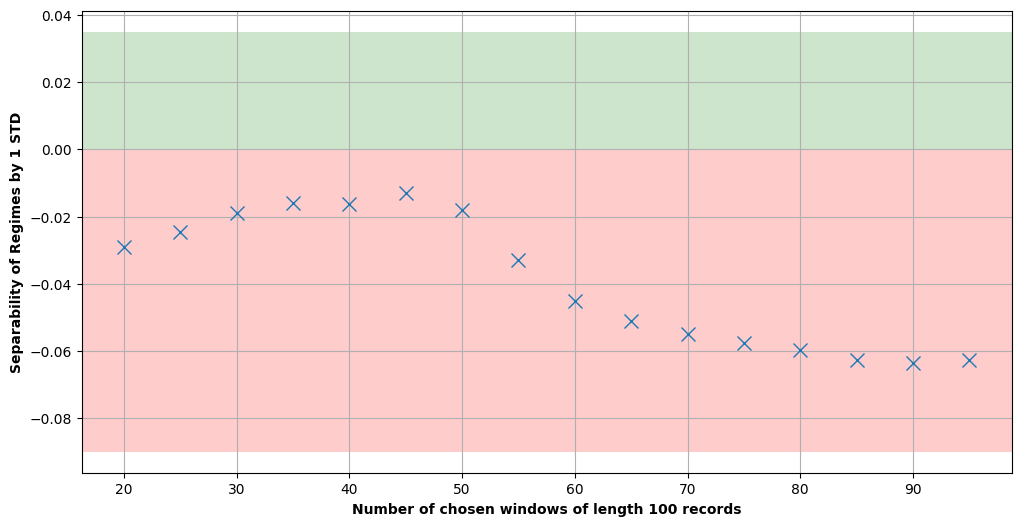

In [102]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(np.arange(20,100,5), np.array(densities_diff)*-1-np.array(stds_addition), 'x', markersize=10)
# ax.margins(0)
ax.axhspan(0, 0.035, facecolor='green', alpha=0.2)
ax.axhspan(-0.09, 0, facecolor='red', alpha=0.2)
ax.grid()
ax.set_ylabel('Separability of Regimes by 1 STD', weight='semibold')
ax.set_xlabel('Number of chosen windows of length 100 records', weight='semibold')
plt.savefig('Plots/regimes_seperabilities_99.png', dpi=400)

# 16) Tehran 2 Regime Crossed (Based on Median Threshold) Period of 90 Far - 00 Far

In [103]:
thr16_1 = nm.find_median_crossed_threshold(tehran_df_TwoReg_Ox_1_same_length)
thr16_2 = nm.find_median_crossed_threshold(tehran_df_TwoReg_Ox_2_same_length)
thr16 = min(thr16_1, thr16_2)

In [104]:
thr16

0.44333333333333336

In [105]:
nm = Net_moduls()
crossed_network_TwoReg_Ox_1 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length, method='crossed_', threshold=thr16)

In [106]:
nm.get_network_features(crossed_network_TwoReg_Ox_1)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.717874,743,0.814036,0.717874,0.006412,0.794786,1.282126


In [107]:
nm.get_network_features(crossed_network_TwoReg_Ox_1).to_csv('Excels/16_1.csv')

In [108]:
b16_1 = dict(nx.degree(crossed_network_TwoReg_Ox_1))
b16_1 = np.array(dict(sorted(b16_1.items(), key=lambda item: item[1])))
b16_1

array({'CPI': 12, 'M1': 12, 'AbzaralatePezeshki': 13, 'Coin': 14, 'Brent Oil': 19, 'M2': 20, 'FaravardehayeNafti': 21, 'Euro': 23, 'HOUSE': 23, 'DastgahayeBargi': 24, 'USD': 27, 'Gold': 28, 'Mansojat': 28, 'GDP': 30, 'MahsolateFelezi': 32, 'HamlVaNaghl': 32, 'Mali': 32, 'KanehayeGeyreFelezi': 33, 'VasayelErtebati': 34, 'EstekrajeNaft': 36, 'paper': 36, 'Lastic': 36, 'Bimeh': 36, 'SayerMadan': 37, 'EntesharVaChap': 37, 'MashinAlat': 37, 'GazaeeBejozGhand': 37, 'Daroee': 37, 'KashiVaSeramik': 37, 'SayerMali': 37, 'Rayaneh': 37, 'KanehayeFelezi': 37, 'Agriculture': 38, 'Wood': 38, 'FelezateAsasi': 38, 'GhandVaShekar': 38, 'ChandReshteSanati': 39, 'Siman': 39, 'Bank': 39, 'index': 40, 'Shimiyaee': 40, 'SarmayeGozari': 40, 'Amlakva': 40, 'FaniVaMohandesi': 40, 'CoalMining': 41, 'khodrosazi': 42},
      dtype=object)

In [109]:
crossed_network_TwoReg_Ox_2 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length, method='crossed_', threshold=thr16)

In [110]:
nm.get_network_features(crossed_network_TwoReg_Ox_2)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.564251,584,0.638292,0.564251,0.009903,0.703362,1.435749


In [111]:
nm.get_network_features(crossed_network_TwoReg_Ox_2).to_csv('Excels/16_2.csv')

In [112]:
b16_2 = dict(nx.degree(crossed_network_TwoReg_Ox_2))
b16_2 = np.array(dict(sorted(b16_2.items(), key=lambda item: item[1])))
b16_2

array({'Euro': 12, 'Mansojat': 13, 'Gold': 14, 'FaravardehayeNafti': 16, 'USD': 17, 'Coin': 17, 'KanehayeFelezi': 18, 'Brent Oil': 19, 'M2': 19, 'GDP': 19, 'AbzaralatePezeshki': 20, 'HOUSE': 20, 'Agriculture': 21, 'ChandReshteSanati': 21, 'VasayelErtebati': 21, 'M1': 22, 'GhandVaShekar': 22, 'Shimiyaee': 23, 'EntesharVaChap': 24, 'FelezateAsasi': 24, 'CPI': 24, 'Lastic': 25, 'Wood': 26, 'HamlVaNaghl': 26, 'Bimeh': 26, 'Rayaneh': 26, 'SayerMadan': 27, 'CoalMining': 29, 'Bank': 29, 'EstekrajeNaft': 30, 'MahsolateFelezi': 30, 'khodrosazi': 30, 'GazaeeBejozGhand': 30, 'KashiVaSeramik': 31, 'FaniVaMohandesi': 31, 'paper': 32, 'MashinAlat': 32, 'DastgahayeBargi': 32, 'Daroee': 32, 'SarmayeGozari': 32, 'Mali': 33, 'index': 34, 'Siman': 34, 'KanehayeGeyreFelezi': 34, 'Amlakva': 35, 'SayerMali': 36},
      dtype=object)

# 17) Tehran 2 Regime crossed (Based on Median Threshold) Period of 90 Far - 98 Dey/ Last 100 Records

In [114]:
def crosscorr(datax, datay, lag=0, wrap=False):
    if wrap:
        shiftedy = datay.shift(lag)
        transfer_entropy_dfshiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else:
        return datax.corr(datay.shift(lag))

In [115]:
def find_median_crossed_100_threshold(df):
    cross_offsets = []
    for i in range(len(df.columns)):
        for j in range(len(df.columns)):
            seconds = 5
            fps = 5
            rs = [crosscorr(df[df.columns[i]],df[df.columns[j]], lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
            offset = np.floor(len(rs)/2)-np.argmax(rs)
            cross_offsets.append(offset)
    cross_offsets = np.array(cross_offsets)
    cross_offsets = cross_offsets[cross_offsets>0]
    df_corr_flatten_nonNan = cross_offsets[~np.isnan(cross_offsets)]
    df_corr_flatten_nonNan.sort()
    df_corr_flatten_nonNan = df_corr_flatten_nonNan/max(df_corr_flatten_nonNan)
    median_corr_coef = np.median(df_corr_flatten_nonNan)
    return median_corr_coef, cross_offsets

In [116]:
def construct_network( df, method, threshold):   
    if method == 'crossed_100_':
        cross_offsets = []
        for i in range(len(df.columns)):
            for j in range(len(df.columns)):
                seconds = 5
                fps = 5
                rs = [crosscorr(df[df.columns[i]],df[df.columns[j]], lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
                offset = np.floor(len(rs)/2)-np.argmax(rs)
                cross_offsets.append(offset)

        cross_offsets = np.array(cross_offsets)
        cross_offsets = cross_offsets[~np.isnan(cross_offsets)]
        cross_offsets = cross_offsets/max(cross_offsets)
        crossed_offset_matrix = cross_offsets.reshape((df.shape[1],df.shape[1]))
        crossed_df = pd.DataFrame(crossed_offset_matrix , columns=(df.columns)).set_index(df.columns)
        df_cc = crossed_df


        # apply corr coeff threshold and create new df
        list_symbols = df_cc.columns.to_list()
        list_from = []
        list_to = []
        list_corr_coeff = []
        for i , sym_from in enumerate(list_symbols):
            for sym_to in list_symbols:
                if sym_from != sym_to:
                    corr_coef = df_cc.loc[sym_from, sym_to]
                    if abs(corr_coef) < threshold:
                        list_from.append(sym_from)
                        list_to.append(sym_to) 
                        list_corr_coeff.append(corr_coef)

        # create df for constructing graph
        df_graph = pd.DataFrame({'from':list_from, 'to':list_to, 
                                'corr coeff':list_corr_coeff})

        G_crossed = nx.from_pandas_edgelist(df_graph, 'from', 'to')
        return cross_offsets

In [117]:
thr17_1 = construct_network(tehran_df_TwoReg_Ox_1_same_length_98[-100:], method='crossed_100_', threshold=thr17)


NameError: name 'thr17' is not defined

In [118]:
len(thr17_1)

NameError: name 'thr17_1' is not defined

In [119]:
thr17_1 = nm.find_median_crossed_100_threshold(tehran_df_TwoReg_Ox_1_same_length_98[-100:])
thr17_2 = nm.find_median_crossed_100_threshold(tehran_df_TwoReg_Ox_2_same_length_98[-100:])
thr17 = min(thr17_1, thr17_2)

In [120]:
thr17

0.56

In [121]:
crossed_network_TwoReg_Ox_1_98_last100 = nm.construct_network(tehran_df_TwoReg_Ox_1_same_length_98[-100:], method='crossed_100_', threshold=thr17)

In [122]:
nm.get_network_features(crossed_network_TwoReg_Ox_1_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.672727,666,0.787336,0.672727,0.007611,0.769276,1.327273


In [123]:
nm.get_network_features(crossed_network_TwoReg_Ox_1_98_last100).to_csv('Excels/17_1.csv')

In [124]:
b17_1 = dict(nx.degree(crossed_network_TwoReg_Ox_1_98_last100))
b17_1 = np.array(dict(sorted(b17_1.items(), key=lambda item: item[1])))
b17_1

array({'Brent Oil': 6, 'M1': 9, 'HOUSE': 11, 'M2': 11, 'CPI': 12, 'Gold': 15, 'USD': 17, 'Coin': 17, 'Euro': 19, 'GDP': 21, 'FaravardehayeNafti': 25, 'DastgahayeBargi': 25, 'VasayelErtebati': 30, 'EstekrajeNaft': 31, 'CoalMining': 32, 'Mansojat': 32, 'Wood': 33, 'paper': 33, 'KashiVaSeramik': 33, 'Siman': 33, 'Bank': 33, 'EntesharVaChap': 34, 'khodrosazi': 34, 'Daroee': 34, 'KanehayeGeyreFelezi': 34, 'HamlVaNaghl': 34, 'Rayaneh': 34, 'MahsolateFelezi': 35, 'SayerMadan': 35, 'MashinAlat': 35, 'GazaeeBejozGhand': 35, 'SarmayeGozari': 35, 'SayerMali': 35, 'Bimeh': 35, 'Amlakva': 35, 'Mali': 35, 'index': 36, 'Agriculture': 36, 'GhandVaShekar': 36, 'ChandReshteSanati': 36, 'FaniVaMohandesi': 36, 'Lastic': 37, 'FelezateAsasi': 39, 'Shimiyaee': 39, 'KanehayeFelezi': 40},
      dtype=object)

In [125]:
crossed_network_TwoReg_Ox_2_98_last100 = nm.construct_network(tehran_df_TwoReg_Ox_2_same_length_98[-100:], method='crossed_100_', threshold=thr17)

In [126]:
nm.get_network_features(crossed_network_TwoReg_Ox_2_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.568687,563,0.618596,0.568687,0.010031,0.703575,1.431313


In [127]:
nm.get_network_features(crossed_network_TwoReg_Ox_2_98_last100).to_csv('Excels/17_2.csv')

In [128]:
b17_2 = dict(nx.degree(crossed_network_TwoReg_Ox_2_98_last100))
b17_2 = np.array(dict(sorted(b17_2.items(), key=lambda item: item[1])))
b17_2

array({'CPI': 13, 'FaravardehayeNafti': 13, 'Gold': 15, 'Coin': 16, 'Brent Oil': 20, 'Euro': 20, 'Bimeh': 20, 'KanehayeFelezi': 20, 'VasayelErtebati': 20, 'HOUSE': 21, 'EstekrajeNaft': 22, 'Siman': 22, 'Wood': 23, 'Bank': 23, 'M2': 24, 'GDP': 24, 'ChandReshteSanati': 24, 'M1': 24, 'Mansojat': 24, 'DastgahayeBargi': 24, 'MahsolateFelezi': 25, 'FelezateAsasi': 25, 'GhandVaShekar': 25, 'SayerMadan': 25, 'GazaeeBejozGhand': 25, 'Agriculture': 26, 'CoalMining': 26, 'paper': 26, 'Mali': 26, 'USD': 27, 'KashiVaSeramik': 27, 'Rayaneh': 27, 'Daroee': 27, 'SarmayeGozari': 28, 'Shimiyaee': 29, 'HamlVaNaghl': 29, 'EntesharVaChap': 29, 'khodrosazi': 29, 'FaniVaMohandesi': 30, 'index': 31, 'Lastic': 33, 'Amlakva': 33, 'KanehayeGeyreFelezi': 35, 'SayerMali': 35, 'MashinAlat': 36},
      dtype=object)

# 18) Tehran 2 Regime crossed (Based on Median Threshold) Period of 90 Far - 98 Dey/ 50 windows of 100 Records

In [129]:
nm = Net_moduls()
crossed_network_TwoReg_Ox_90_98_averged = nm.get_network_features_averaged_median(tehran_df, \
                                                                                  regimes_column= tehran_df_reg['Ox_2'].iloc[:-300],\
                                                                                  method='crossed_100_',edges_threshold=200, \
                                                                                  target_window=100, \
                                                                                  target_length=50)

/Users/hossein4527/MEGA/MEGAsync/Commit/Neda_PhD/neda_sep2023/Time_Series_Trend_Forcasting/Codes/Shifted DF by Lags/ned.py:1106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selected_regimes'] = regimes_column


Number of columns data in our DataFrame is = 46
fixed_thr= 0.68


In [130]:
crossed_network_TwoReg_Ox_90_98_averged

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
Means,2.0,2.0,0.723010,715.780000,0.798684,0.723010,0.006442,0.795382,1.276990
STDs,0.0,0.0,0.016616,16.449415,0.015419,0.016616,0.000386,0.010426,0.016616
Means,2.0,2.0,0.661253,654.640000,0.686978,0.661253,0.007878,0.751487,1.338747
STDs,0.0,0.0,0.016362,16.198715,0.014159,0.016362,0.000381,0.008752,0.016362


In [131]:
crossed_network_TwoReg_Ox_90_98_averged.to_csv('Excels/18.csv')

# 19) Tehran 2 Regime crossed (Based on Median Threshold) Period of 90 Far - 00 Far/ 50 windows of 100 Records

In [132]:
nm = Net_moduls()
crossed_network_TwoReg_Ox_90_00_averged = nm.get_network_features_averaged_median(tehran_df_completeDates, \
                                                                                  regimes_column = tehran_df_reg['Ox_2'],\
                                                                                  method='crossed_100_',edges_threshold=200, \
                                                                                  target_window=100, target_length=50)

Number of columns data in our DataFrame is = 46
fixed_thr= 0.56


In [133]:
crossed_network_TwoReg_Ox_90_00_averged

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
Means,2.0,2.860000,0.680372,701.620000,0.794754,0.680372,0.007313,0.773283,1.321234
STDs,0.0,0.350510,0.027759,27.002562,0.020967,0.027759,0.000619,0.016557,0.027822
Means,2.0,2.080000,0.538687,533.300000,0.584296,0.538687,0.010731,0.688688,1.461434
STDs,0.0,0.274048,0.016047,15.886395,0.018784,0.016047,0.000377,0.007869,0.016193


In [134]:
crossed_network_TwoReg_Ox_90_00_averged.to_csv('Excels/19.csv')